# Simple Machine Learning
## The Iris Dataset
This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features.
See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.


## 1.0 Import Packages

In [162]:
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline

# Hide All the Warning
import warnings
warnings.filterwarnings('ignore')

# Visualize full output
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

# Import scikit learn - preprocessing/support
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Import Scikit learn - Machine Learning Algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## 2.0 Import Dataset

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data  
Y = iris.target

table_iris_array=np.append(X, Y[:, None], axis=1)
table_iris_dataframe = pd.DataFrame(table_iris_array,columns=['Sepal Length', 'Sepal Width','Petal Length','Petal Width',"Label"])
table_iris_dataframe['Label'] = table_iris_dataframe['Label'].astype(str)

table_iris_dataframe.replace(to_replace={"Label":{"0.0":"Sentosa","1.0":"Versicolour","2.0":"Virginica"}},inplace=True)
table_iris_dataframe

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,Sentosa
1,4.9,3.0,1.4,0.2,Sentosa
2,4.7,3.2,1.3,0.2,Sentosa
3,4.6,3.1,1.5,0.2,Sentosa
4,5.0,3.6,1.4,0.2,Sentosa
5,5.4,3.9,1.7,0.4,Sentosa
6,4.6,3.4,1.4,0.3,Sentosa
7,5.0,3.4,1.5,0.2,Sentosa
8,4.4,2.9,1.4,0.2,Sentosa
9,4.9,3.1,1.5,0.1,Sentosa


### 2.1 Visualization
Select any 2 features of 4 features in X

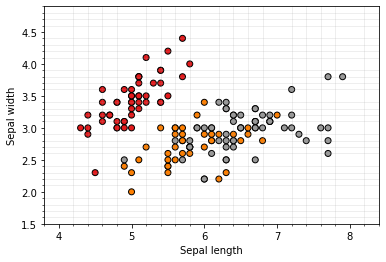

In [4]:
# Selection features
X1 = X[:,0] # Select First features
X2 = X[:,1] # Select Second Features

# Plot the training points
plt.scatter(X1, X2, c=Y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlim(X1.min() - .5, X1.max() + .5)
plt.ylim(X2.min() - .5, X2.max() + .5)
#plt.xticks(())
#plt.yticks(())
plt.show()

### 2.2 Perform PCA to visualize all the 4 features

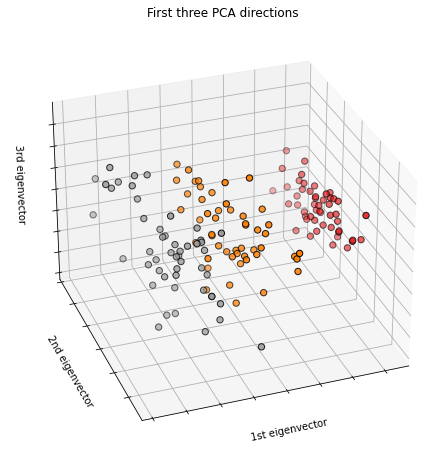

In [5]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Perform PCA
X_reduced = PCA(n_components=3).fit_transform(X)

# Plot 3 Components
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 2.3 Histogram of each feature

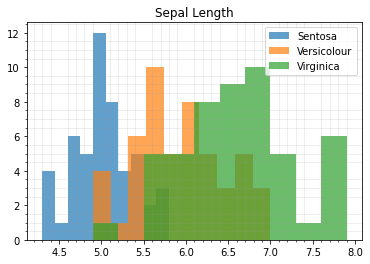

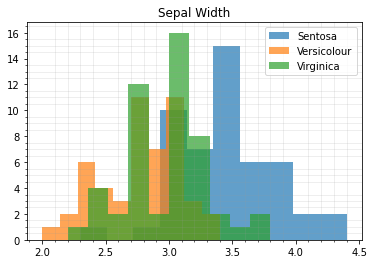

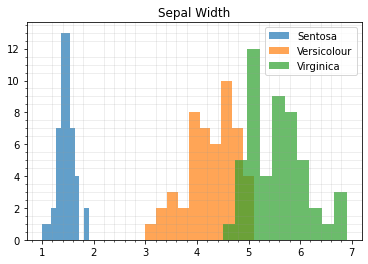

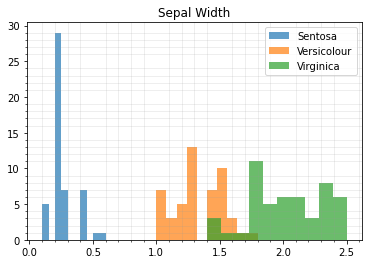

In [6]:
# Extract individual label table
Sentonsa_table = table_iris_dataframe.query('Label== "Sentosa"')
Versicolour_table = table_iris_dataframe.query('Label== "Versicolour"')
Virginica_table = table_iris_dataframe.query('Label== "Virginica"')

# sET Properties of Histogram
n_bins = 10

# Plot Histogram
plt.figure()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.hist(Sentonsa_table['Sepal Length'], bins = n_bins,alpha=0.7)
plt.hist(Versicolour_table['Sepal Length'], bins = n_bins, alpha=0.7)
plt.hist(Virginica_table['Sepal Length'], bins = n_bins,alpha=0.7)
plt.title('Sepal Length')
plt.legend(["Sentosa","Versicolour","Virginica"])

plt.figure()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.hist(Sentonsa_table['Sepal Width'], bins = n_bins,alpha=0.7)
plt.hist(Versicolour_table['Sepal Width'], bins = n_bins, alpha=0.7)
plt.hist(Virginica_table['Sepal Width'], bins = n_bins,alpha=0.7)
plt.title('Sepal Width')
plt.legend(["Sentosa","Versicolour","Virginica"])

plt.figure()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.hist(Sentonsa_table['Petal Length'], bins = n_bins,alpha=0.7)
plt.hist(Versicolour_table['Petal Length'], bins = n_bins, alpha=0.7)
plt.hist(Virginica_table['Petal Length'], bins = n_bins,alpha=0.7)
plt.title('Sepal Width')
plt.legend(["Sentosa","Versicolour","Virginica"])

plt.figure()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.hist(Sentonsa_table['Petal Width'], bins = n_bins,alpha=0.7)
plt.hist(Versicolour_table['Petal Width'], bins = n_bins, alpha=0.7)
plt.hist(Virginica_table['Petal Width'], bins = n_bins,alpha=0.7)
plt.title('Sepal Width')
plt.legend(["Sentosa","Versicolour","Virginica"])

### 2.4 Side-by-side box

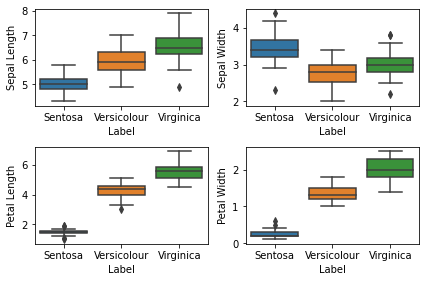

In [7]:
fig, axs = plt.subplots(2, 2)
fn = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
cn = ['Sentosa', 'Versicolour', 'Virginica']
sns.boxplot(x = 'Label', y = 'Sepal Length', data = table_iris_dataframe, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Label', y = 'Sepal Width', data = table_iris_dataframe, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Label', y = 'Petal Length', data = table_iris_dataframe, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Label', y = 'Petal Width', data = table_iris_dataframe,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

### 2.5 Violin Plot

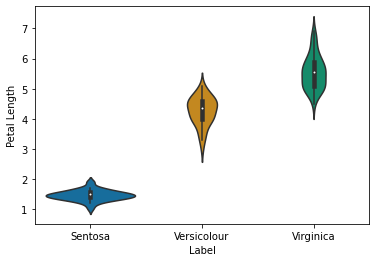

In [8]:
sns.violinplot(x="Label", y="Petal Length", data=table_iris_dataframe, size=5, order = cn, palette = 'colorblind');

### 2.6 Scatterplots of All Paired Attributes

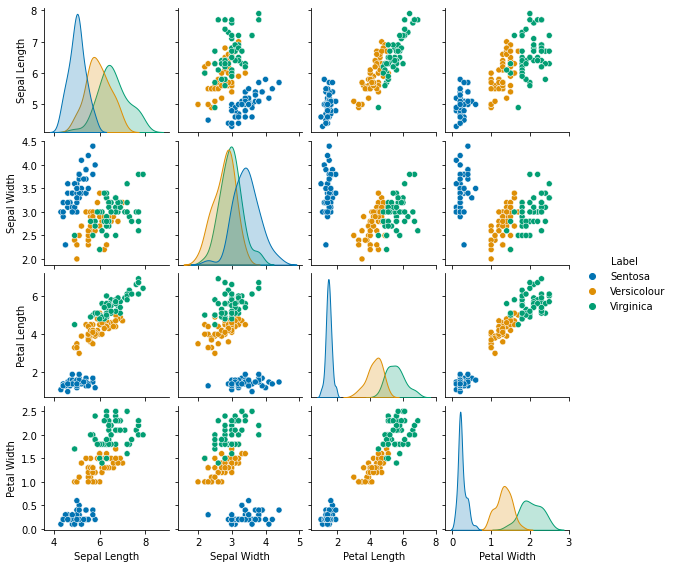

In [9]:
sns.pairplot(table_iris_dataframe, hue="Label", height = 2, palette = 'colorblind');

### 2.7 Correlation Matrix

(0.0, 4.0)

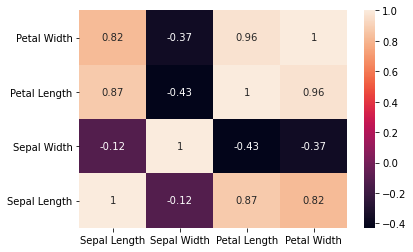

In [10]:
corrmat = table_iris_dataframe.corr()
sns.heatmap(corrmat, annot = True);
plt.ylim([0,4])

### 2.8 Parallel Coordinate Plot

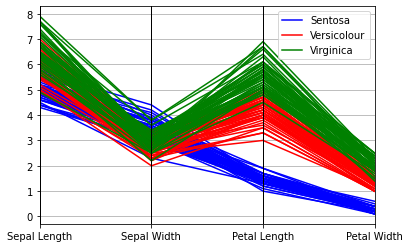

In [11]:
parallel_coordinates(table_iris_dataframe, "Label", color = ['blue', 'red', 'green']);

## 3.0 Statistics

Distrubution using groupby and size:

In [12]:
table_iris_dataframe.groupby('Label').size()

Label
Sentosa        50
Versicolour    50
Virginica      50
dtype: int64

In [13]:
table_iris_dataframe.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
Sentonsa_table.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [15]:
Versicolour_table.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [16]:
Virginica_table.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## 4.0 Machine Learning

Prepare Testing and Training data

In [17]:
train, test = train_test_split(table_iris_dataframe, stratify=table_iris_dataframe['Label'],test_size = 0.4, random_state = 42, shuffle=True)

In [18]:
train.groupby('Label').size()

Label
Sentosa        30
Versicolour    30
Virginica      30
dtype: int64

In [19]:
test.groupby('Label').size()

Label
Sentosa        20
Versicolour    20
Virginica      20
dtype: int64

Structure the data to proper format for training

In [20]:
X_train = train[['Sepal Length','Sepal Width','Petal Length','Petal Width']]
y_train = train.Label
X_test = test[['Sepal Length','Sepal Width','Petal Length','Petal Width']]
y_test = test.Label

### 4.1 Decision Tree

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### 4.1.1 Train Model

In [30]:
mod_decision_tree = DecisionTreeClassifier(random_state = 1)
mod_decision_tree.fit(X_train,y_train)
prediction_decision_tree=mod_decision_tree.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}%".format(metrics.accuracy_score(prediction_decision_tree,y_test)*100))

The accuracy of the Decision Tree is 96.667%


#### 4.1.2 Visualize the Importances of features

In [22]:
mod_decision_tree.feature_importances_

array([0.        , 0.02777778, 0.42211717, 0.55010505])

#### 4.1.3 Visualize the structure of decision tree

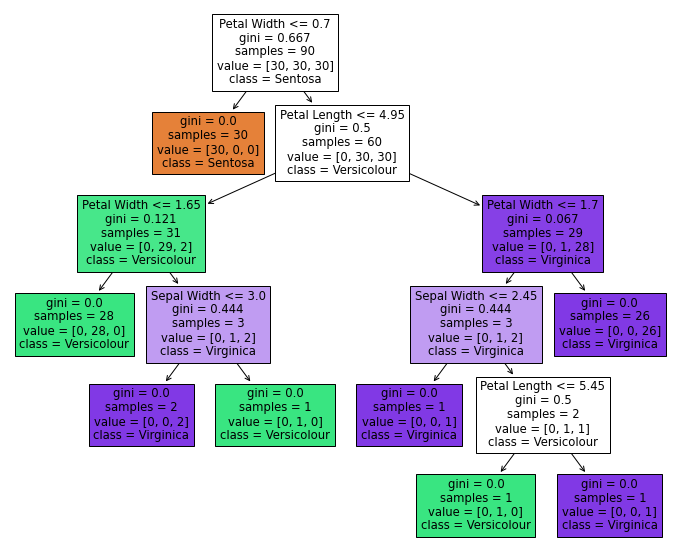

In [23]:
plt.figure(figsize = (12,10))
plot_tree(mod_decision_tree, feature_names = fn, class_names = cn, filled = True);

#### 4.1.4 Confusion Matrix

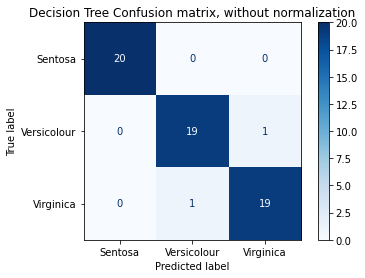

In [24]:
disp = metrics.plot_confusion_matrix(mod_decision_tree, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

### 4.2 Gaussian Naive Bayes Classifier
Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html <br>
Example : https://scikit-learn.org/stable/modules/naive_bayes.html#

#### 4.2.1 Train Model

In [29]:
mod_naive_bayes = GaussianNB()
mod_naive_bayes.fit(X_train,y_train)
prediction_naive_bayes=mod_naive_bayes.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}%".format(metrics.accuracy_score(prediction_naive_bayes,y_test)*100))

The accuracy of the Decision Tree is 93.333%


#### 4.2.2 Confusion Matrix

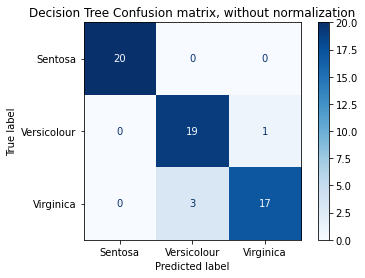

In [26]:
disp = metrics.plot_confusion_matrix(mod_naive_bayes, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

### 4.3 Linear Discriminant Analysis (LDA)
Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

#### 4.3.1 Train Model

In [27]:
mod_LDA = LinearDiscriminantAnalysis()
mod_LDA.fit(X_train,y_train)
prediction_LDA=mod_LDA.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction_LDA,y_test)))

The accuracy of the Decision Tree is 0.983


#### 4.3.2 Visualize the Model (Retrain it for 2 dimension)

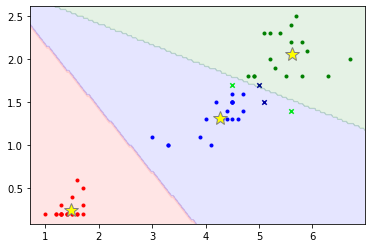

In [233]:
# Retrain Model
mod_LDA_visualize = LinearDiscriminantAnalysis()
mod_LDA_visualize.fit(X_train[['Petal Length','Petal Width']],y_train)
prediction_LDA_visualize=mod_LDA_visualize.predict(X_test[['Petal Length','Petal Width']])

tp           = (y_test == prediction_LDA_visualize)
tp0,tp1,tp2  = tp[y_test_1==1], tp[y_test_1==2], tp[y_test_1==3]
X0,X1,X2     = X_test[y_test_1==1],X_test[y_test_1==2],X_test[y_test_1==3]
X0_tp, X0_fp = X0[tp0],X0[~tp0]
X1_tp, X1_fp = X1[tp1],X1[~tp1]
X2_tp, X2_fp = X2[tp2],X2[~tp2]

# class1
plt.scatter(X0_tp['Petal Length'],X0_tp['Petal Width'],marker='.',color='red')
plt.scatter(X0_fp['Petal Length'],X0_fp['Petal Width'],marker='x',s=20,color='#990000') #dark red

# class2
plt.scatter(X1_tp['Petal Length'],X1_tp['Petal Width'],marker='.',color='blue')
plt.scatter(X1_fp['Petal Length'],X1_fp['Petal Width'],marker='x',s=20,color='#000099') #dark blue

# class3
plt.scatter(X2_tp['Petal Length'],X2_tp['Petal Width'],marker='.',color='green')
plt.scatter(X2_fp['Petal Length'],X2_fp['Petal Width'],marker='x',s=20,color='#00ff00') # green

# class1,2,3 : areas
nx,ny = 200,100   
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy       = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min,y_max,ny))
#Z            = mod_QDA.predict_proba(np.c_[xx.ravel(), yy.ravel()])
#Z            = Z[:,1].reshape(xx.shape)

#Computing the predicted class function for each value on the grid
Z  = mod_LDA_visualize.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(Z=='Sentosa', 0, Z)
Z = np.where(Z=='Versicolour', 1, Z)
Z = np.where(Z=='Virginica', 2, Z)
Z  = Z.reshape(xx.shape)

# Colormap
color_list = ['Blues','Greens','Reds']

#Plot the filled and boundary contours
plt.contourf( xx, yy, Z, 2, alpha = .1, colors = ('red','blue','green'))
plt.contour( xx, yy, Z, 2, alpha = .1, colors = ('red','blue','green'))
#plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',norm=colors.Normalize(0., 1.), zorder=0)
#plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

# means
plt.plot(mod_LDA_visualize.means_[0][0],mod_LDA_visualize.means_[0][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
plt.plot(mod_LDA_visualize.means_[1][0], mod_LDA_visualize.means_[1][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
plt.plot(mod_LDA_visualize.means_[2][0], mod_LDA_visualize.means_[2][1],'*', color='yellow', markersize=15, markeredgecolor='grey')

#### 4.3.3 Confusion Matrix

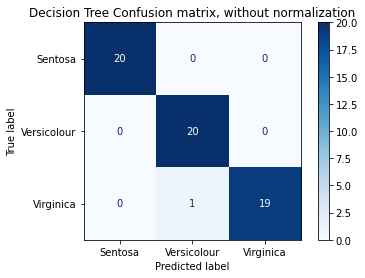

In [126]:
disp = metrics.plot_confusion_matrix(mod_LDA, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

### 4.4 Quadratic Discriminant Analysis (QDA)
Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html <br>
Example : https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html

#### 4.4.1 Train Model

In [231]:
mod_QDA = QuadraticDiscriminantAnalysis()
mod_QDA.fit(X_train,y_train)
prediction_QDA=mod_QDA.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}%".format(metrics.accuracy_score(prediction_QDA,y_test)*100))

The accuracy of the Decision Tree is 98.333%


#### 4.4.2 Visualization (Re-train the model to 2 features for visualization

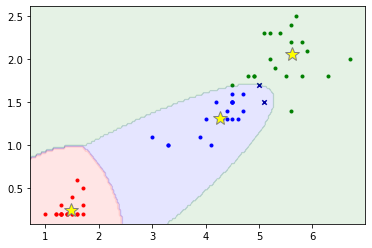

In [230]:
# Retrain Model
mod_QDA_visualize = QuadraticDiscriminantAnalysis()
mod_QDA_visualize.fit(X_train[['Petal Length','Petal Width']],y_train)
prediction_QDA_visualize=mod_QDA_visualize.predict(X_test[['Petal Length','Petal Width']])

tp           = (y_test == prediction_QDA_visualize)
tp0,tp1,tp2  = tp[y_test_1==1], tp[y_test_1==2], tp[y_test_1==3]
X0,X1,X2     = X_test[y_test_1==1],X_test[y_test_1==2],X_test[y_test_1==3]
X0_tp, X0_fp = X0[tp0],X0[~tp0]
X1_tp, X1_fp = X1[tp1],X1[~tp1]
X2_tp, X2_fp = X2[tp2],X2[~tp2]

# class1
plt.scatter(X0_tp['Petal Length'],X0_tp['Petal Width'],marker='.',color='red')
plt.scatter(X0_fp['Petal Length'],X0_fp['Petal Width'],marker='x',s=20,color='#990000') #dark red

# class2
plt.scatter(X1_tp['Petal Length'],X1_tp['Petal Width'],marker='.',color='blue')
plt.scatter(X1_fp['Petal Length'],X1_fp['Petal Width'],marker='x',s=20,color='#000099') #dark blue

# class3
plt.scatter(X2_tp['Petal Length'],X2_tp['Petal Width'],marker='.',color='green')
plt.scatter(X2_fp['Petal Length'],X2_fp['Petal Width'],marker='x',s=20,color='#00ff00') # green

# class1,2,3 : areas
nx,ny = 200,100   
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy       = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min,y_max,ny))
#Z            = mod_QDA.predict_proba(np.c_[xx.ravel(), yy.ravel()])
#Z            = Z[:,1].reshape(xx.shape)

#Computing the predicted class function for each value on the grid
Z  = mod_QDA_visualize.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(Z=='Sentosa', 0, Z)
Z = np.where(Z=='Versicolour', 1, Z)
Z = np.where(Z=='Virginica', 2, Z)
Z  = Z.reshape(xx.shape)

# Colormap
color_list = ['Blues','Greens','Reds']

#Plot the filled and boundary contours
plt.contourf( xx, yy, Z, 2, alpha = .1, colors = ('red','blue','green'))
plt.contour( xx, yy, Z, 2, alpha = .1, colors = ('red','blue','green'))
#plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',norm=colors.Normalize(0., 1.), zorder=0)
#plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

# means
plt.plot(mod_QDA_visualize.means_[0][0],mod_QDA_visualize.means_[0][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
plt.plot(mod_QDA_visualize.means_[1][0], mod_QDA_visualize.means_[1][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
plt.plot(mod_QDA_visualize.means_[2][0], mod_QDA_visualize.means_[2][1],'*', color='yellow', markersize=15, markeredgecolor='grey')

#### 4.4.3 Confusion Matrix

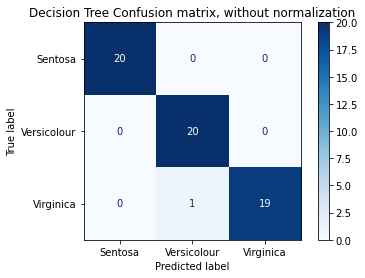

In [234]:
disp = metrics.plot_confusion_matrix(mod_QDA, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

### 4.5 K Neares Neighbors (KNN)
Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### 4.5.1 Train Model

In [237]:
mod_neigh = KNeighborsClassifier(n_neighbors=3)
mod_neigh.fit(X_train,y_train)
prediction_neigh=mod_neigh.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}%".format(metrics.accuracy_score(prediction_neigh,y_test)*100))

The accuracy of the Decision Tree is 96.667%


#### 4.5.2 Confusion Matrix

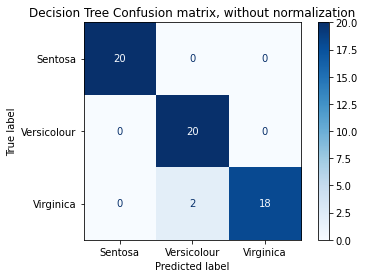

In [238]:
disp = metrics.plot_confusion_matrix(mod_neigh, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

## 4.0 Compare All the Model

In [271]:
model = ['mod_decision_tree','mod_naive_bayes','mod_LDA','mod_QDA','mod_neigh']

prediction_decision_tree_d="{:.3f}%".format(metrics.accuracy_score(prediction_decision_tree,y_test)*100)
prediction_naive_bayes_d="{:.3f}%".format(metrics.accuracy_score(prediction_naive_bayes,y_test)*100)
prediction_LDA_d="{:.3f}%".format(metrics.accuracy_score(prediction_LDA,y_test)*100)
prediction_QDA_d="{:.3f}%".format(metrics.accuracy_score(prediction_QDA,y_test)*100)
prediction_neigh_d="{:.3f}%".format(metrics.accuracy_score(prediction_neigh,y_test)*100)

model_prediction = [prediction_decision_tree_d,prediction_naive_bayes_d,prediction_LDA_d,prediction_QDA_d,prediction_neigh_d]
df = pd.DataFrame(model_prediction,columns=["Accuracy"])
df.index = model
df

,Accuracy
mod_decision_tree,96.667%
mod_naive_bayes,93.333%
mod_LDA,98.333%
mod_QDA,98.333%
mod_neigh,96.667%
